# Regression Open-Ended Project

-----

# Previous Notebooks

- Web Scraping
- Cleaning data

In [1]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ebert_imdb_df = pickle.load(open('../data/interim/ebert_imdb_df.pkl', 'rb'))

In [4]:
ebert_imdb_df.head()

,Title,IMDB_Rating,Rating_Count,Description,Metascore,User_Review_Count,Critic_Review_Count,Genre_List,Stars_List,Director,Country,Release_Date,EbertStars,Year,URL,Rating,Runtime,Review
0,Call Me by Your Name,8.4,4766.0,Directed by Luca Guadagnino. With Armie Hamme...,93.0,39.0,107.0,"Drama, Romance","Armie Hammer,, Timothée Chalamet,, Michael Stu...",Luca Guadagnino,USA,2017-11-24,4.0,2017.0,/reviews/call-me-by-your-name-2017,R,130.0,Luca Guadagnino’s films are all about the tran...
1,Mudbound,7.4,2666.0,"Directed by Dee Rees. With Carey Mulligan, Ga...",86.0,22.0,61.0,Drama,"Carey Mulligan,, Garrett Hedlund,, Jason Clarke",Dee Rees,USA,2017-11-17,4.0,2017.0,/reviews/mudbound-2017,NR,134.0,“Mudbound” is all about perception. How it can...
2,Justice League,7.4,78007.0,"Directed by Zack Snyder. With Ben Affleck, Ga...",46.0,709.0,286.0,"Action, Adventure, Fantasy","Ben Affleck,, Gal Gadot,, Jason Momoa",Zack Snyder,USA,2017-11-17,3.0,2017.0,/reviews/justice-league-2017,PG-13,120.0,For a film about a band of heroes trying to st...
3,Wonder,8.0,1579.0,Directed by Stephen Chbosky. With Jacob Tremb...,67.0,22.0,55.0,Drama,"Jacob Tremblay,, Owen Wilson,, Izabela Vidovic",Stephen Chbosky,USA,2017-11-17,3.0,2017.0,/reviews/wonder-2017,PG,113.0,Based on the R.J. Palacio novel of the same na...
4,Mr. Roosevelt,6.8,116.0,"Directed by Noël Wells. With Noël Wells, Nick...",73.0,NaN,55.0,Comedy,"Noël Wells,, Nick Thune,, Britt Lower",Noël Wells,USA,2017-11-22,3.0,2017.0,/reviews/mr-roosevelt-2017,NR,90.0,Emily Martin (Noël Wells) doesn't quite know h...


In [5]:
ebert_imdb_df.columns

Index(['Title', 'IMDB_Rating', 'Rating_Count', 'Description', 'Metascore',
       'User_Review_Count', 'Critic_Review_Count', 'Genre_List', 'Stars_List',
       'Director', 'Country', 'Release_Date', 'EbertStars', 'Year', 'URL',
       'Rating', 'Runtime', 'Review'],
      dtype='object')

## Histogram of Ebert Ratings

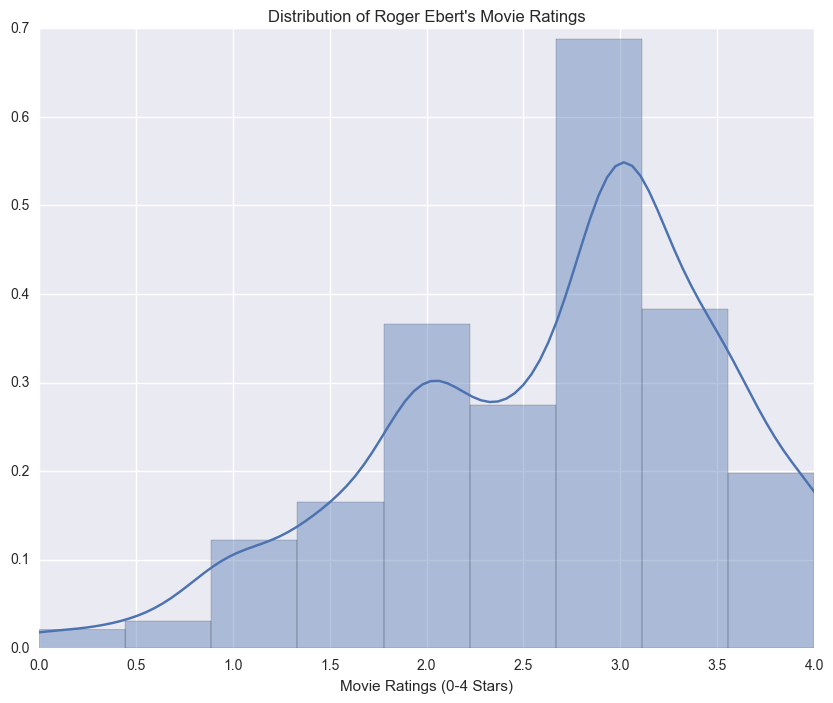

In [6]:
plt.figure(figsize=(10,8))
ax = sns.distplot(ebert_imdb_df['EbertStars'].dropna(), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings (0-4 Stars)')
ax.set(xlim=(0, 4))
ax.set_title("Distribution of Roger Ebert's Movie Ratings");

## Pairplot of Numerical Features

In [7]:
movie_ratings = ebert_imdb_df[['Title', 'EbertStars', 'IMDB_Rating', 'Rating_Count', 
                            'Metascore', 'User_Review_Count', 'Critic_Review_Count', 'Year']]

movie_ratings = movie_ratings.dropna()

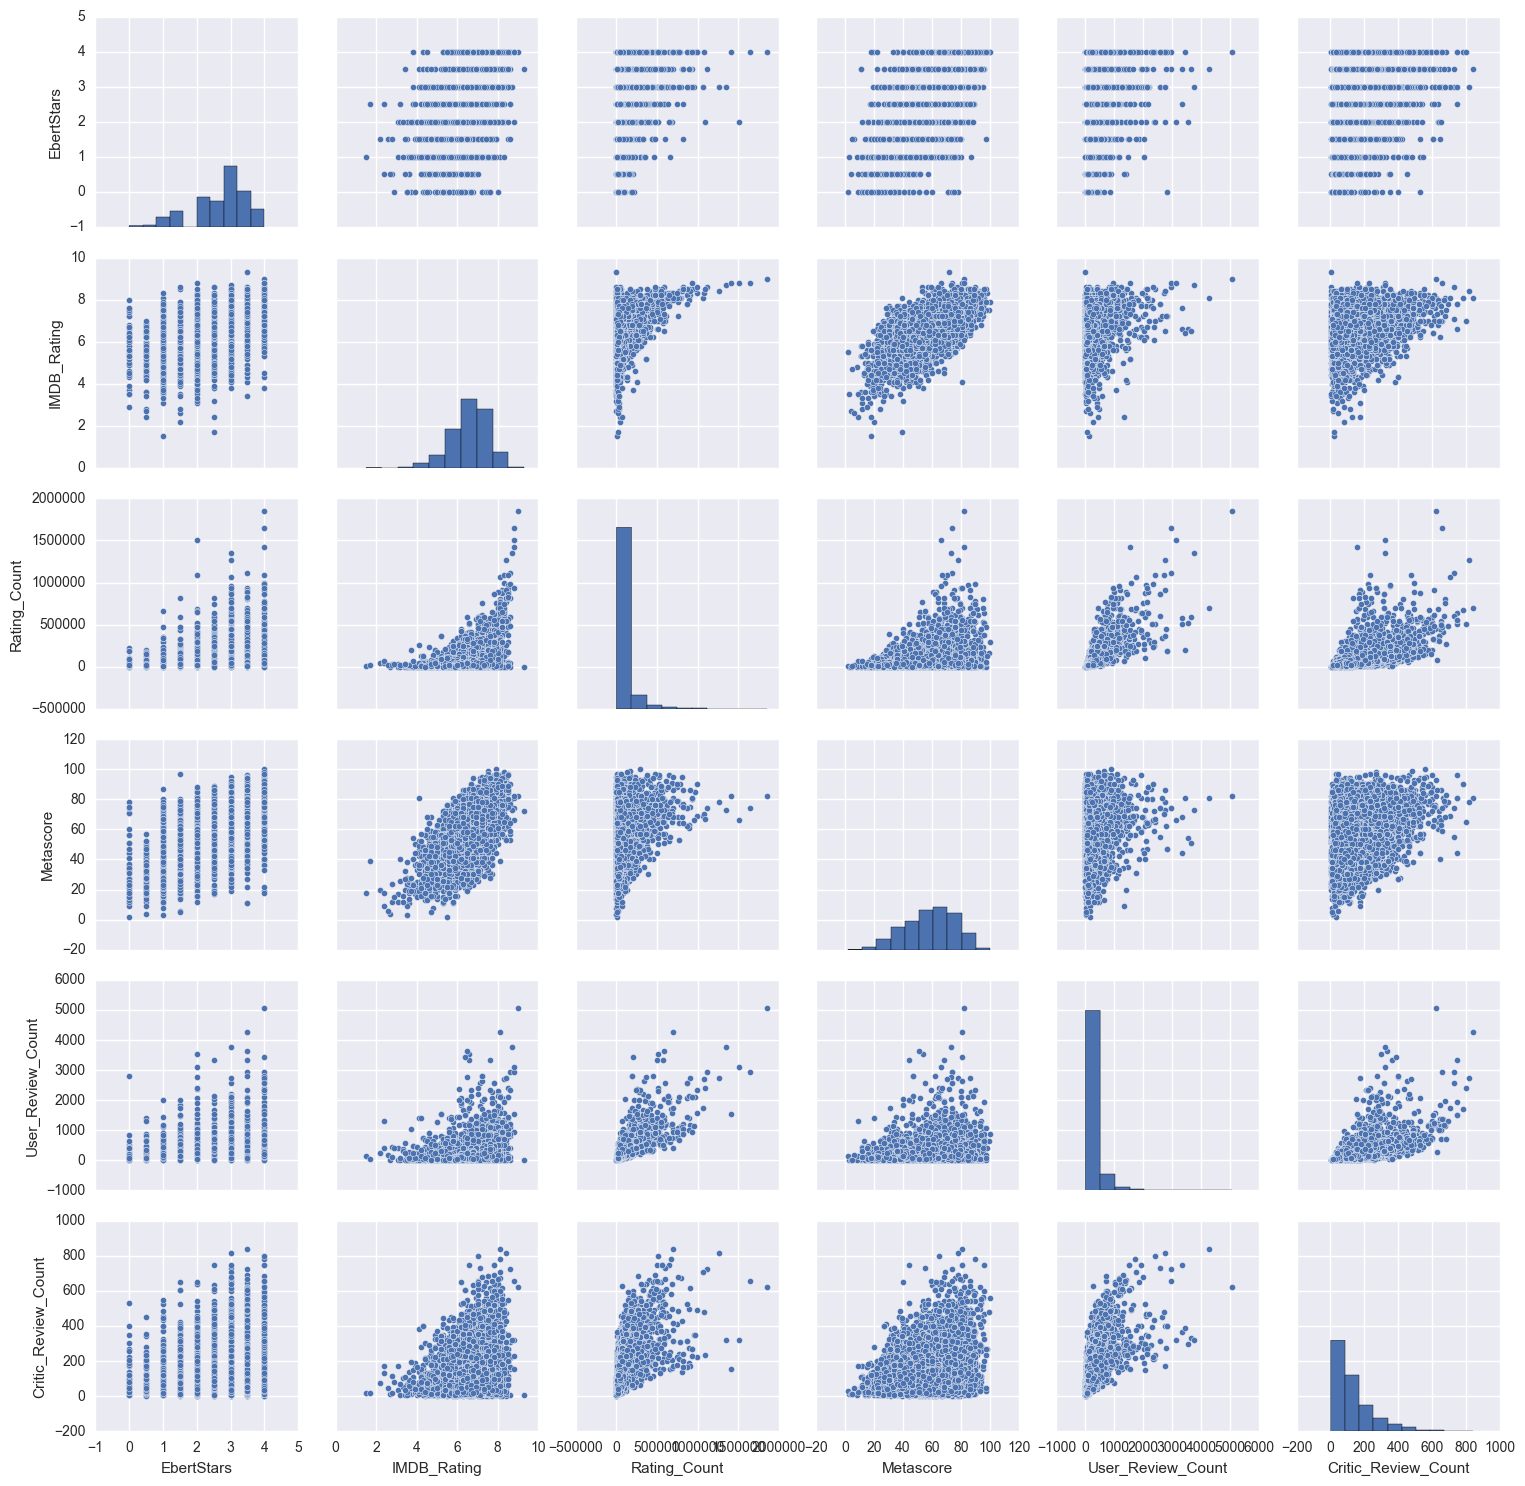

In [8]:
sns.pairplot(movie_ratings[['EbertStars', 'IMDB_Rating', 'Rating_Count', 
                            'Metascore', 'User_Review_Count', 'Critic_Review_Count']]);

## Univariate Visualizations by Rating

In [9]:
def univariate_visuals(rating=3.0):
    individual_rating = movie_ratings[movie_ratings['EbertStars'] == rating]
    
    # Rating Count
    ax = plt.axes()
    ax = sns.distplot((individual_rating['Rating_Count']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Rating Count for {}'.format(rating))
    ax.set_title("Normal Scale of Rating Count")
    plt.show()
    
    ax = plt.axes()
    ax = sns.distplot(np.log(individual_rating['Rating_Count']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='User Rating Count for {}'.format(rating))
    ax.set_title("Log Transformation of Rating Count")
    plt.show()
    
    # IMDB Rating
    ax = plt.axes()
    ax = sns.distplot((individual_rating['IMDB_Rating']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='IMDB Rating for {}'.format(rating))
    ax.set_title("Distribution of IMDB Rating")
    plt.show()
    
    # Metascore
    ax = plt.axes()
    ax = sns.distplot((individual_rating['Metascore']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Metascore for {}'.format(rating))
    ax.set_title("Distribution of Metascore")
    plt.show()
    
    # User Review Count
    ax = plt.axes()
    ax = sns.distplot((individual_rating['User_Review_Count']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='User Review Count for {}'.format(rating))
    ax.set_title("Distribution of User Review Count")
    plt.show()
    
    ax = plt.axes()
    ax = sns.distplot(np.log(individual_rating['User_Review_Count']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='User Review Count for {}'.format(rating))
    ax.set_title("Log Distribution of User Review Count")
    plt.show()
    
    # Critic Review Count
    ax = plt.axes()
    ax = sns.distplot((individual_rating['Critic_Review_Count']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Critic Review Count for {}'.format(rating))
    ax.set_title("Distribution of Critic Review Count")
    plt.show()    
    
    ax = plt.axes()
    ax = sns.distplot(np.log(individual_rating['Critic_Review_Count']), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Critic Review Count for {}'.format(rating))
    ax.set_title("Log Distribution of Critic Review Count")
    plt.show() 

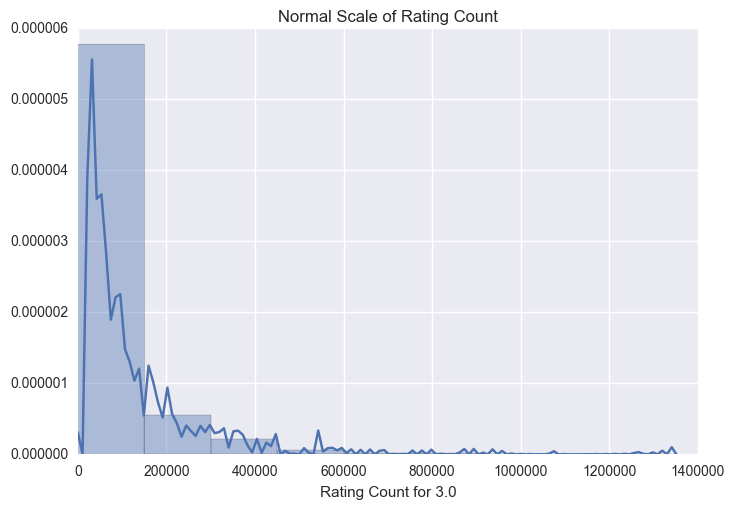

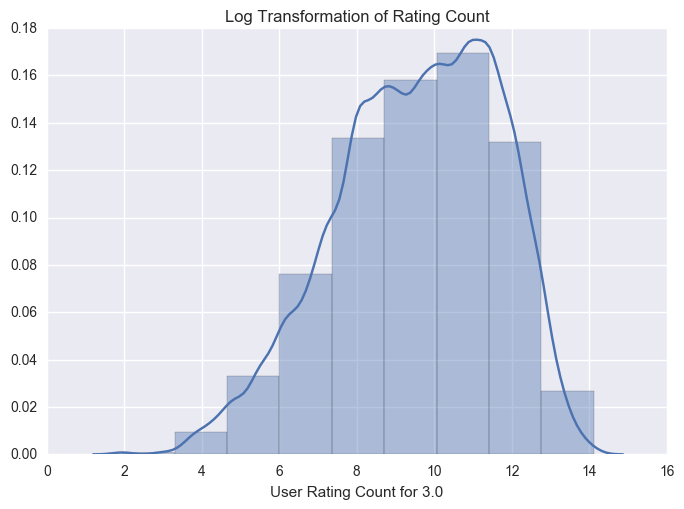

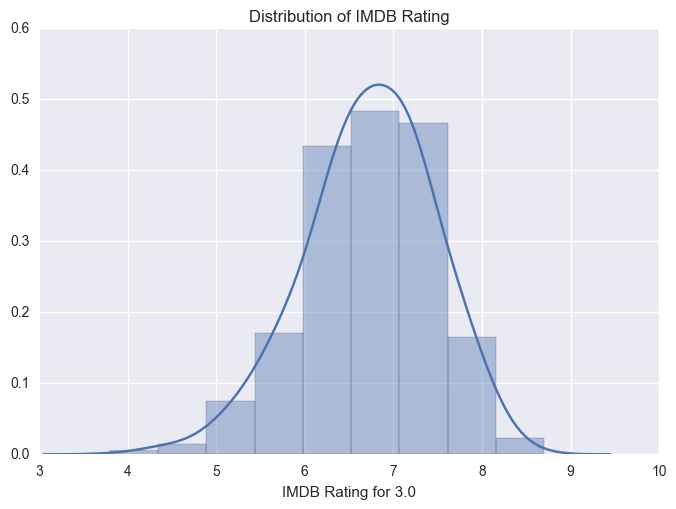

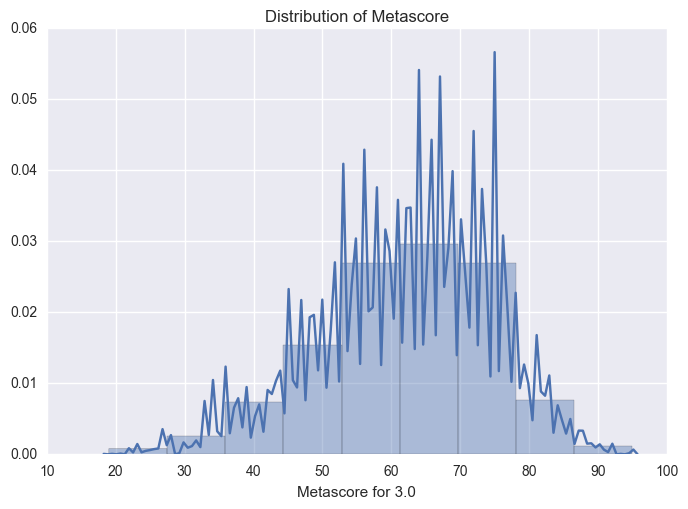

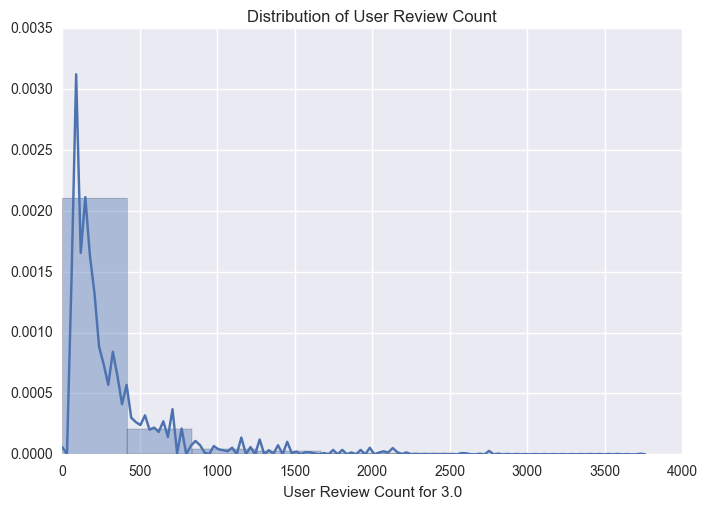

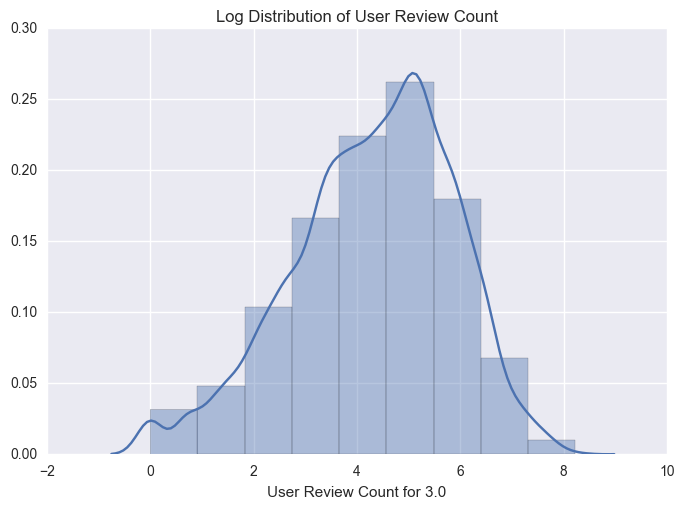

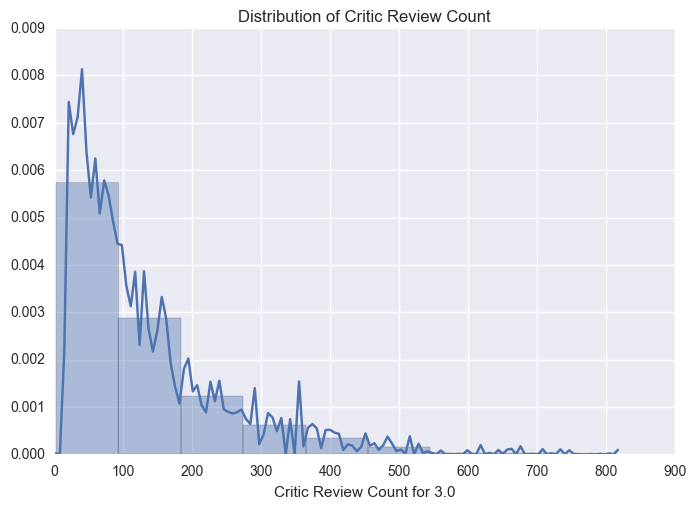

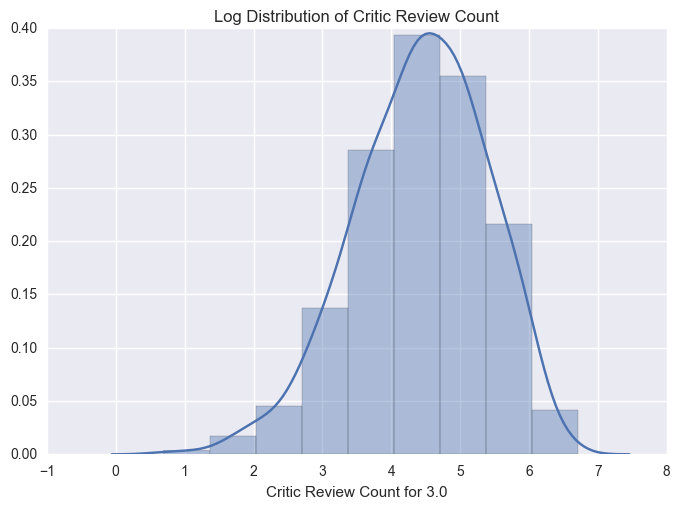

In [10]:
univariate_visuals()

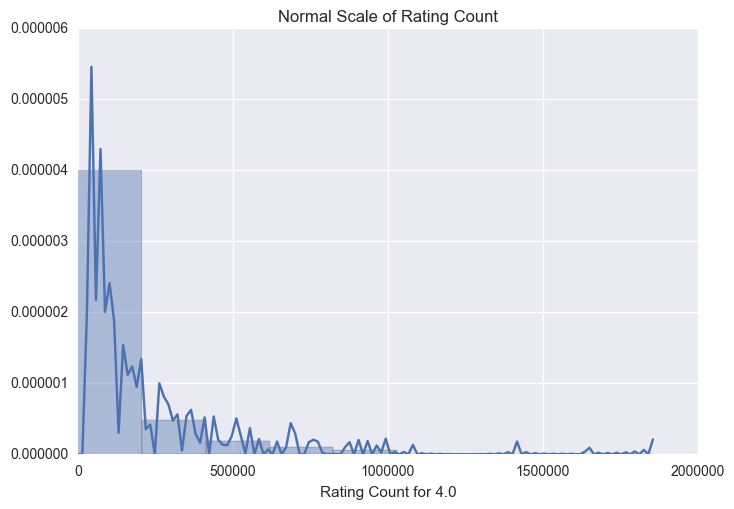

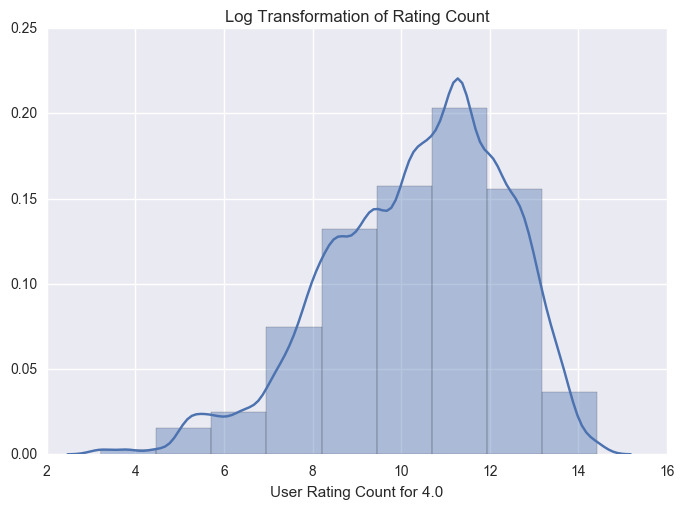

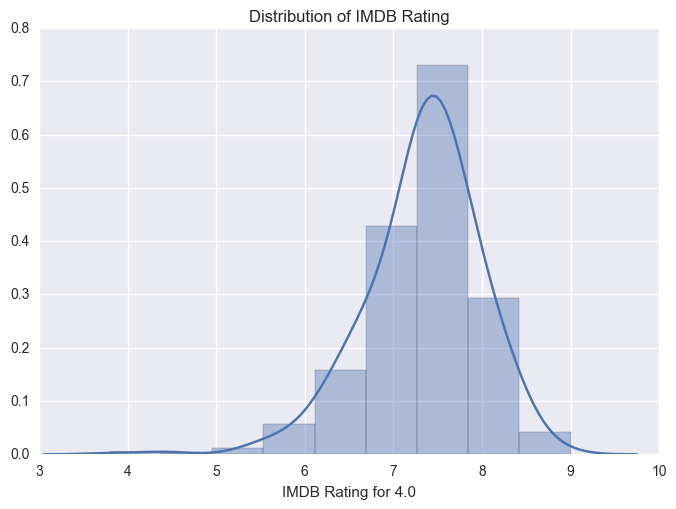

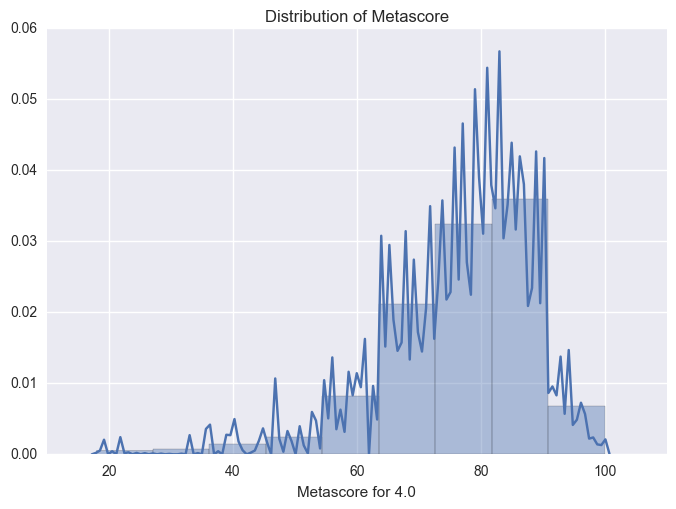

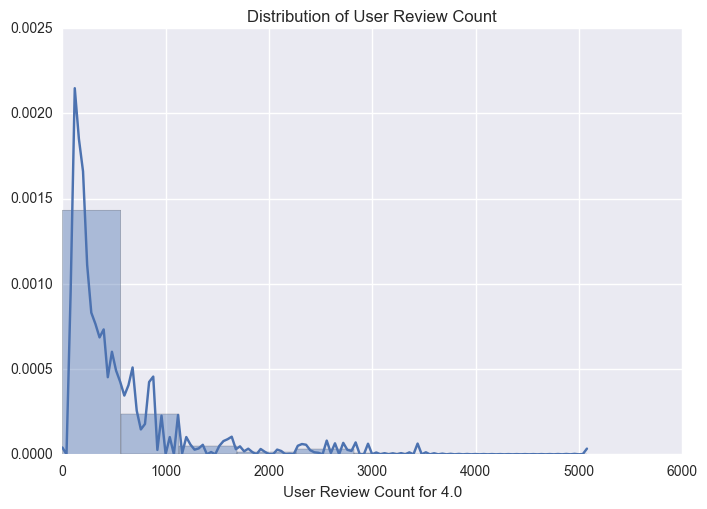

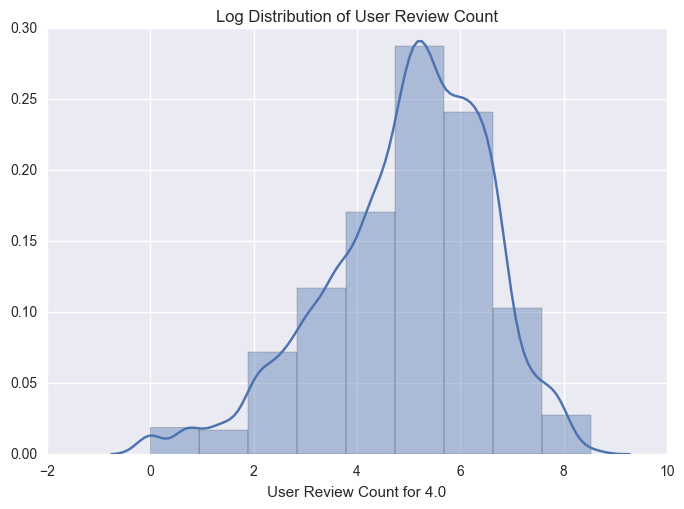

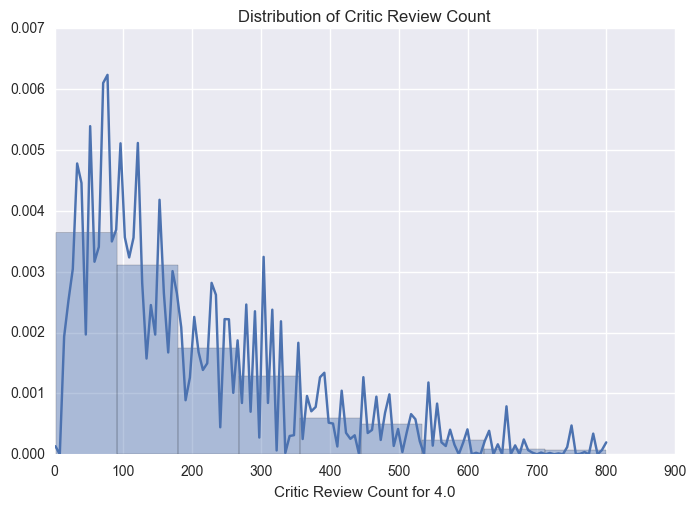

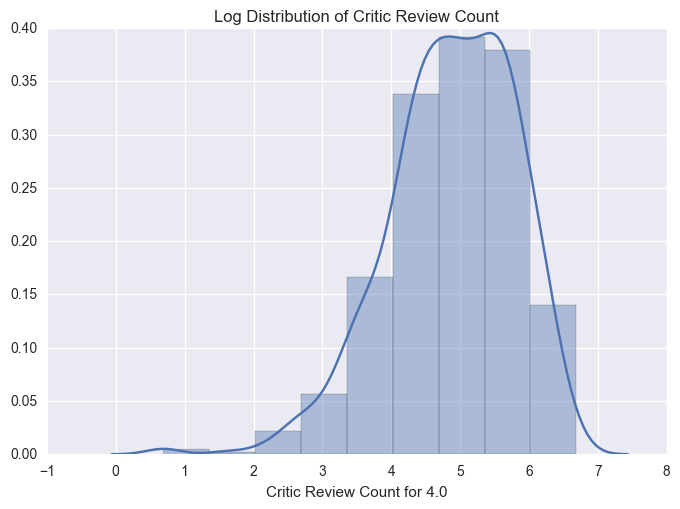

In [11]:
univariate_visuals(rating=4.0)

## Bivariate Visualizations by Rating

In [12]:
def bivariate_visuals(rating=3.0):
    individual_rating = movie_ratings[movie_ratings['EbertStars'] == rating]
    individual_rating['log_user'] = np.log(individual_rating['User_Review_Count'])
    individual_rating['log_critic'] = np.log(individual_rating['Critic_Review_Count'])
    
    # IMDB Rating vs. Metascore
    ax = sns.jointplot('IMDB_Rating', 'Metascore', data=individual_rating, kind='reg', size=9)
    sns.plt.title("IMDB Rating vs. Metascore for Ebert Starts {}".format(rating))
    
    # User Review Count vs. Critic Review Count
    ax = sns.jointplot('log_user', 'log_critic', data=individual_rating, kind='hex', size=9)
    sns.plt.title("User Review Count vs. Critic Review Count (Log Scale) for Ebert Stars {}".format(rating))

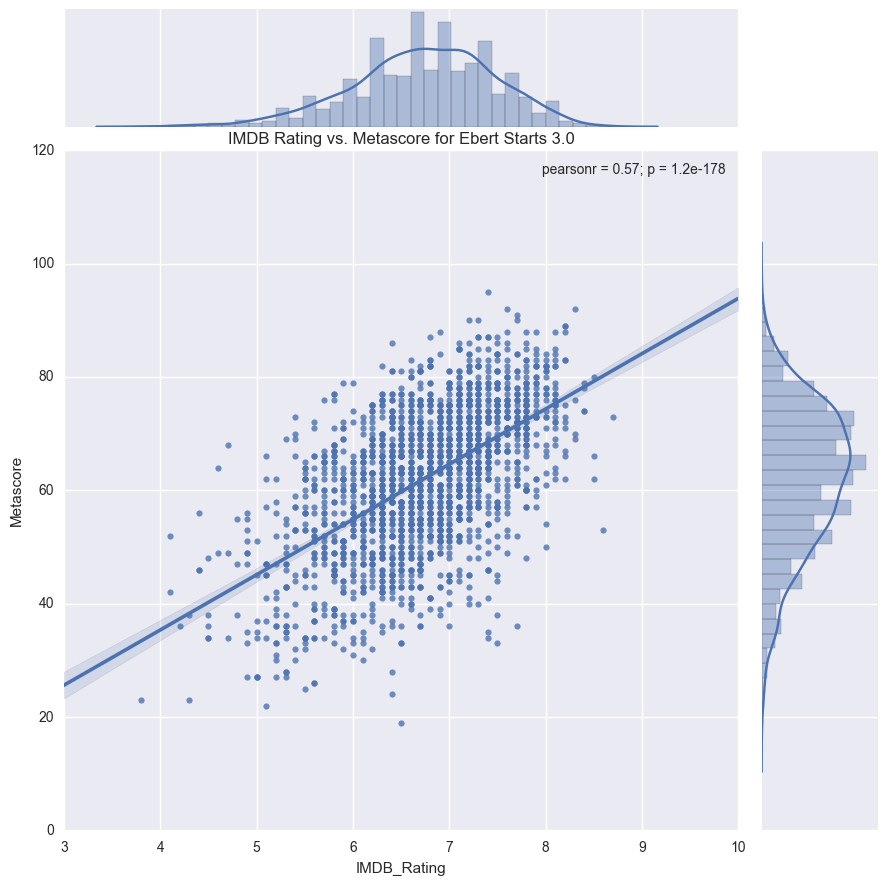

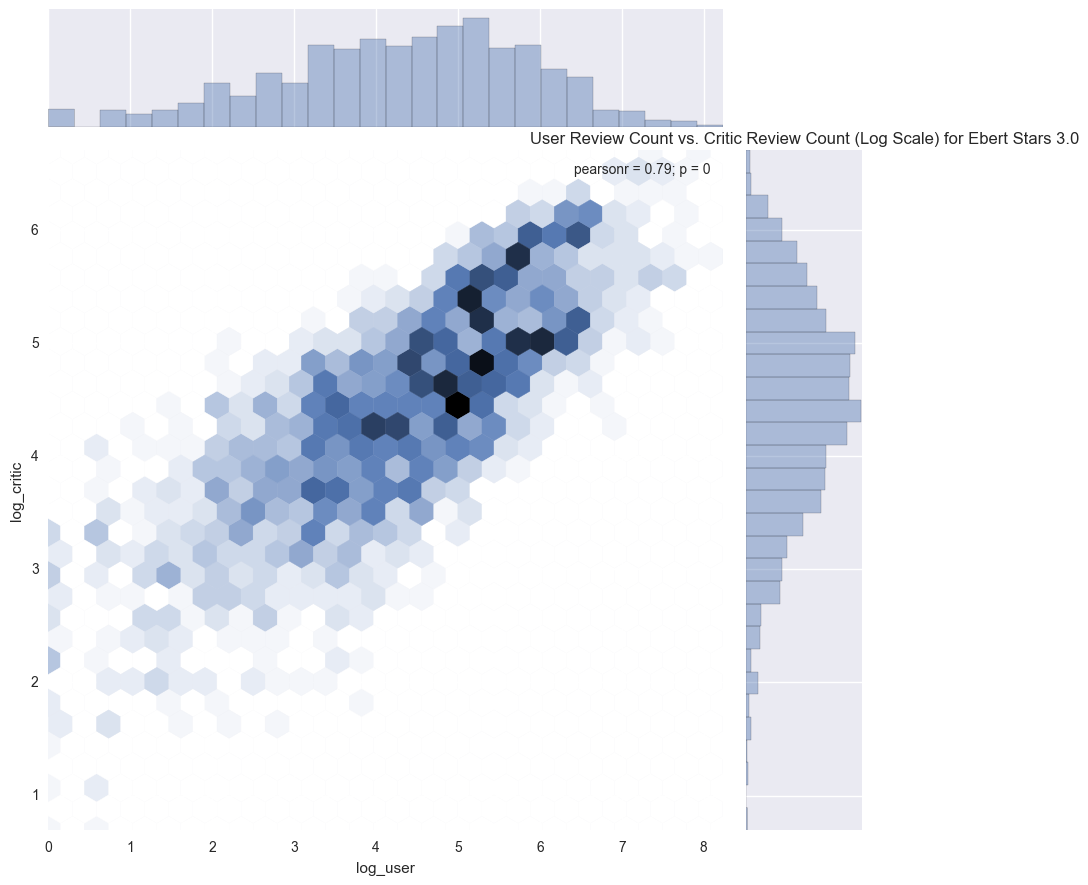

In [13]:
bivariate_visuals()

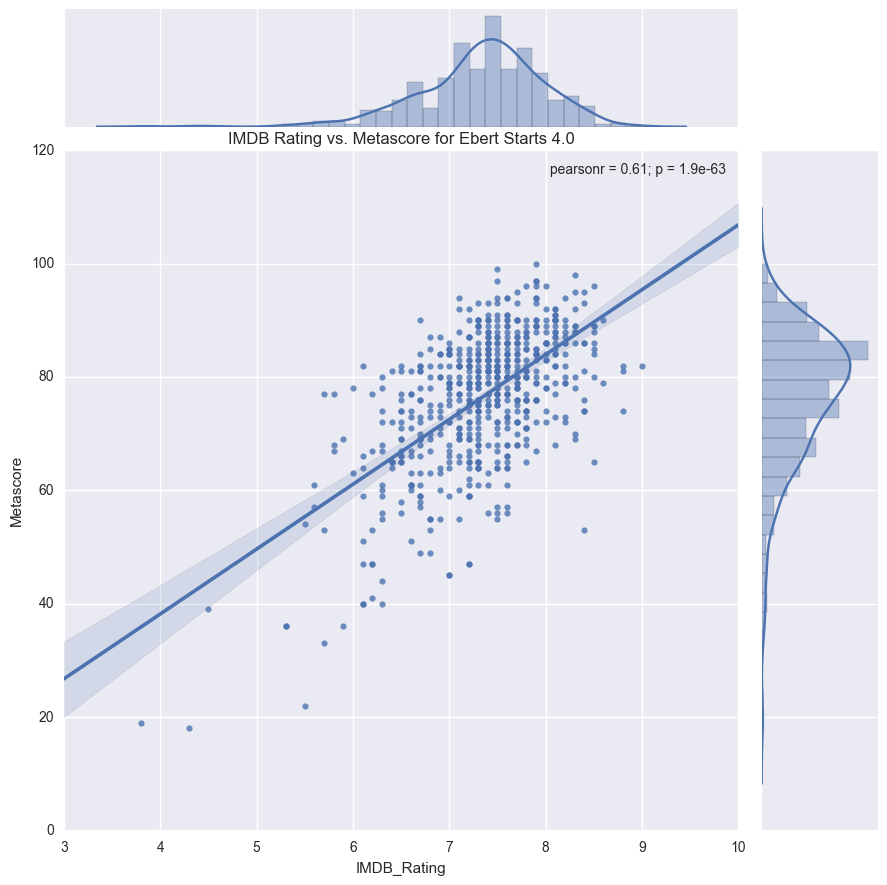

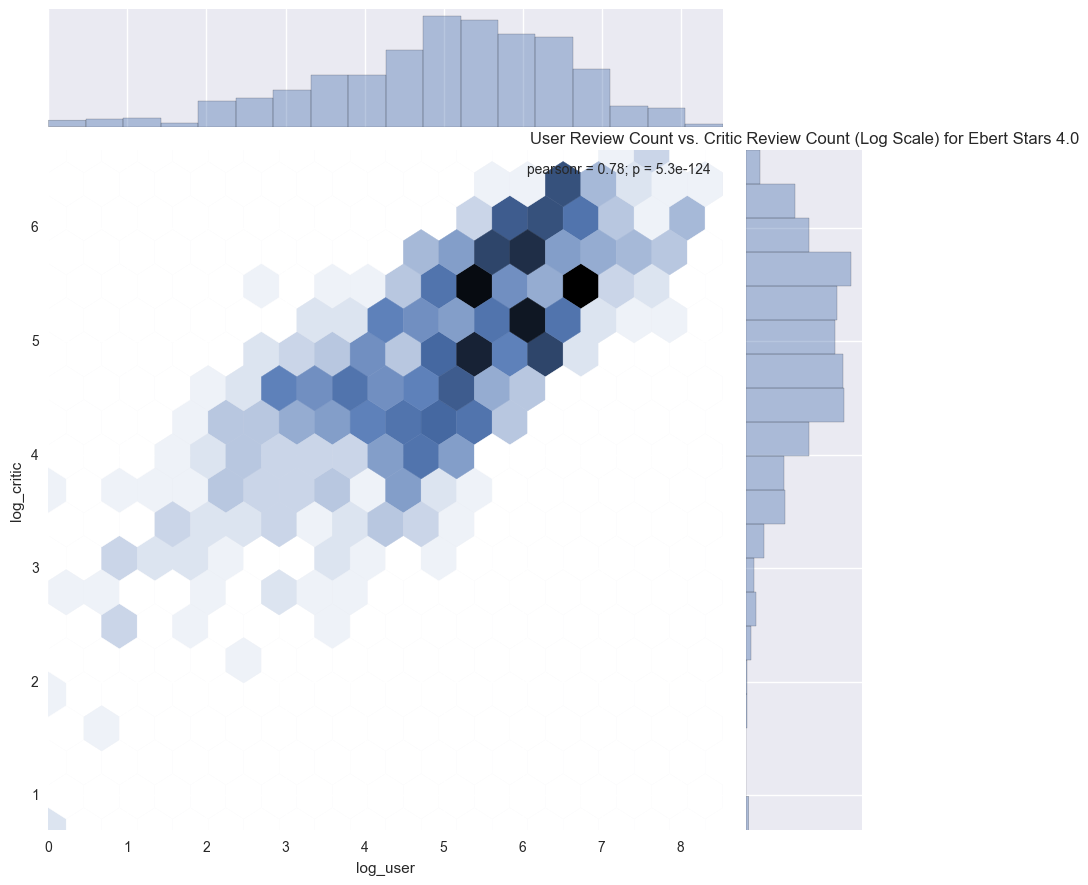

In [14]:
bivariate_visuals(rating=4.0)

## Plan for Following Notebooks

- Feature Engineering
- Making predictions
- Final analysis